# Példa 1.16
- Határozzuk meg a megengedhető $P$ terhelés nagyságát, ha az AC keresztmetszeben a hajlításból származó normálfeszültségre $\sigma_{\rm meg}=200 \, {\rm MPa}$.
- Határozzuk meg a semleges tengely távolságát a C ponttól
<img src="Fig_1.16.PNG" style="width: 400px;">

## Megoldás
Első lépésként importáljuk a szimbolikus számításhoz szükséges modult, és felvesszük a megadott adatokat.

In [19]:
import sympy as sp
sp.init_printing() # Eredmény szép megjelenítése (még a python "gyári" változói esetében is)

# Szimbolikus változókat definiálunk olyan változókra, amik vagy paraméterek vagy ismeretlen értékűek
y, P = sp.symbols("y,P") 

# Adatok
R = 337.5 #mm
h = 100 #mm
A = 3750 #mm^2
I_x = 3320312.5 #mm^4
σ_meg = 200 #MPa

R/h

A megfelelő feszültségi elmélet kiválasztásához vizsgálnunk kell az $R/h$ hányados értékét. Jelen esetben $2<R/h<8$, így a Grashof-képletet használhatjuk, ahol az $I_{0}$ redukált másodrendű nyomatékot közelíthetjük a hajlítás tengelyére számolt másodrendű nyomatékkal. <br> A hajlítónyomaték a vizsgált keresztmetszetben:

In [20]:
M_h = -600*P
M_h

A Grashof-képlettel meghatározhatóak a keresztmetszet pontjaiban a hajlítás hatására ébredő feszültségek:
$$\sigma_{\rm h}(y)=\frac{M_{\rm h}}{R A}+\frac{M_{\rm h}}{I_{\rm x}}y\frac{R}{R+y}.$$

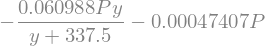

In [21]:
σ_h = M_h/(R*A) + M_h/I_x*y*R/(R+y)

# Megj.: Az '.evalf(5)' metódus kerekíti 5 értékes jegyre a 'float' típusú változókat.
#        Mivel csak kiíráshoz használjuk, így a tárolt kifejezésünket ez nem módosítja.

σ_h.evalf(5)

Hajlításkor a maximális feszültség valamely szélső szálban ébred, így $\sigma_{\rm h}$ -t kiértékeljük ezeken a helyeken:

In [22]:
# A görbületi középponthoz közelebbi szélső szál
σ_h1 = σ_h.subs(y,-37.5)

# A görbületi középponttól távolabb eső szélső szál
σ_h2 = σ_h.subs(y,62.5)

# Megj.: Ha egy cellából több kifejezést szeretnénk kiírni, akkor erre explicit utasítást kell adni a Pythonnak.
#        Erre a standard metódus a 'print()', de notebookban használható a 'display()' is, ami vizuálisan szebben ír ki (formázza).

display(σ_h1.evalf(5))
display(σ_h2.evalf(5))

Látható, hogy a görbületi középponttól távolabbi szálban ébred az __abszolút értékben__ nagyobb feszültség ($ \sigma_{\rm h2} = \sigma_{\rm {h,max}}$), így $P$ maximális nagyságát ezekben a pontokban határozzuk meg. $P$ az alábbi egyenletből számolható ki:
$$ \sigma_{\rm {h, max}} = \sigma_{\rm meg}.$$

In [30]:
# Definiáljuk a nullára rendezett egyenletet, amit meg szeretnénk oldani.

megengedheto_eq = σ_h2-σ_meg

#Ezt követően megoldjuk az egyenletet P-re (kifejezzük P-t), és a megoldást eltároljuk a 'P_meg_list' változóban
P_meg_list = sp.solve(megengedheto_eq, P) # A parancs első argumentuma a megoldandó egyenlet,
                                          # a második pedig a kérdéses változó, amely szerint megoldjuk.
    
# A kapott eredmény egy 'list' objektum, melynek több eleme lenne, ha az egyenletnek 1-nél több gyöke lenne.
# 'P_meg' legyen egyenlő a lista első elemének (azaz indexelés alapján a 0.-nak) abszolút értékével:

P_meg = abs(P_meg_list[0]) # Az abszolút értéke kell, ugyanis méretezésnél a feszültség absz. értékét vizsgáljuk.
display(P_meg.evalf(5))

# Egyszerű egyenletek esetén kézzel is rendezhető az egyenlet:
P_meg = abs(σ_meg/σ_h2*P)
display(P_meg.evalf(5))

A megengedett terhelő erő: $P = 19993\,\rm N.$

A semleges tengelyben a hajlításból származó feszültség nulla, ami felírható a következő egyenlet formájában:
$$\sigma_{\rm h}(y^*)=\frac{M_{\rm h}}{R A}+\frac{M_{\rm h}}{I_{\rm 0}}y^*\frac{R}{R+y^*}=0,$$
ahol
$$M_{\rm h} = -600 P_{\rm {meg}}.$$

In [37]:
M_h = -600*P_meg
egyenlet = M_h/(R*A) + M_h/I_x*y*R/(R+y)

# Megoldjuk az egyenletet 'y'-ra, és tároljuk a 'sol' változóban

# Az eredményt ismét egy  'list' objektumban kapjuk.
sol = sp.solve(egyenlet, y)
sol

In [35]:
# 'y*' legyen egyenlő a 'sol' nevű list első elemével.
y_star = sol[0]

# A semleges szál távolsága a C ponttól:
d_CY = 100 - 37.5 + y_star

d_CY.evalf(5)